In [1]:
import io
import sys
import pandas as pd
import numpy as np
from Pipeline import DPA
import os
sys.path.append('../')
from simulate_frbs import *

%load_ext autoreload
%autoreload 2

## DPA on dynamic spectra

In [2]:
directories = [
    "Constant_SNR_simple_broad",
    "Constant_SNR_simple_narrow",
    "Constant_SNR_simulated_scattered",
    "Constant_SNR_complex",
    "Constant_SNR_drifting"
]

data = []

for directory in directories:
    data_dir = f"/Users/dirkkuiper/Documents/MacBookProDocuments/University/Thesis/Rep_Learn_FRB/{directory}"
    data_per_directory = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".npy"):
            data_per_directory.append(normalize((np.load(os.path.join(data_dir, filename)))))

    data_per_directory = np.array(data_per_directory).reshape(-1, 1024 * 512)[:100]
    data.append(data_per_directory)

# Combine the data from all directories into one array
combined_data = np.concatenate(data, axis=0)

# Reshape the combined data for DPA
combined_data_2d = combined_data.reshape(-1, 1024 * 512)

In [3]:
est = DPA.DensityPeakAdvanced(Z=0.5)

In [4]:
est.fit(combined_data_2d)

DensityPeakAdvanced(Z=0.5)

In [5]:
est.topography_

[[0, 1, 9.781305291471764, 0.38832158167381164],
 [0, 2, 0.0, 0.0],
 [0, 3, 8.690949773918984, 0.5883484054145521],
 [0, 4, 0.0, 0.0],
 [0, 5, 0.0, 0.0],
 [0, 6, 0.0, 0.0],
 [0, 7, 0.0, 0.0],
 [1, 2, 9.465967436261877, 0.3812088627568029],
 [1, 3, 4.753817055789511, 0.3958473906635696],
 [1, 4, 0.0, 0.0],
 [1, 5, 0.0, 0.0],
 [1, 6, 0.0, 0.0],
 [1, 7, 0.0, 0.0],
 [2, 3, 0.0, 0.0],
 [2, 4, 0.0, 0.0],
 [2, 5, 0.0, 0.0],
 [2, 6, 0.0, 0.0],
 [2, 7, 0.0, 0.0],
 [3, 4, 0.0, 0.0],
 [3, 5, 0.0, 0.0],
 [3, 6, 0.0, 0.0],
 [3, 7, 0.0, 0.0],
 [4, 5, 0.0, 0.0],
 [4, 6, 0.0, 0.0],
 [4, 7, 0.0, 0.0],
 [5, 6, 9.083448762601623, 0.3562217559245075],
 [5, 7, 10.4981391493077, 0.5645186610567614],
 [6, 7, 11.371946494668816, 0.3562217559245075]]

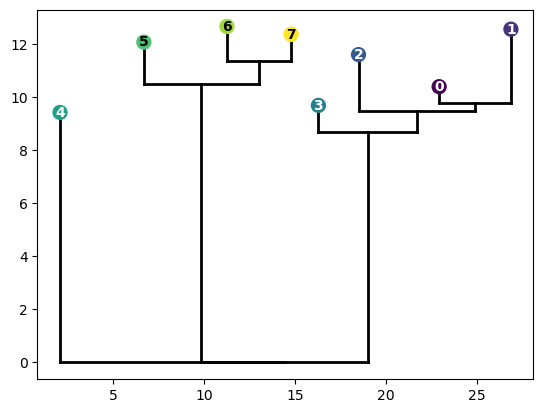

In [6]:
est.get_dendrogram()

In [7]:
est.labels_

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1,
       0, 0, 3, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0,
       2, 0, 3, 2, 1, 3, 1, 1, 2, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 2, 1, 0,
       2, 3, 1, 2, 3, 3, 0, 1, 3, 1, 1, 2, 2, 0, 3, 1, 2, 1, 2, 1, 3, 2,
       0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 1, 2, 3, 2, 2, 2, 0, 0, 1, 0,
       1, 3, 1, 3, 3, 0, 2, 1, 1, 0, 2, 0, 2, 1, 5,

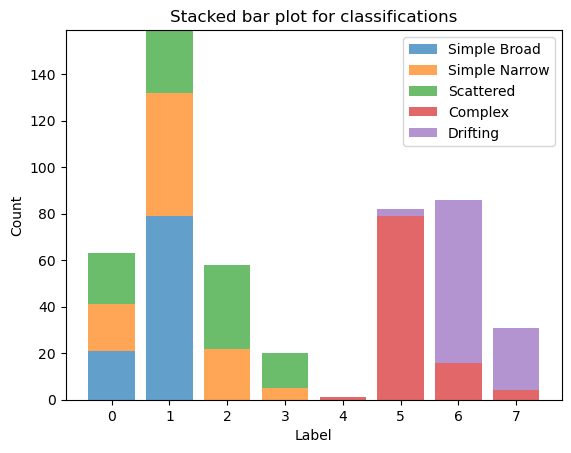

In [17]:
labels = est.labels_

# Number of classes (assuming each class has 100 labels)
num_classes = int(len(labels) / 100)

# Reshape the labels into a 2D array where each row corresponds to a class
labels_2d = np.array(labels).reshape(num_classes, -1)

# Count the occurrences of each label in each class
class_counts = [np.bincount(class_labels, minlength=np.max(labels) + 1) for class_labels in labels_2d]

# Plot a stacked bar plot for each class
bottom = np.zeros(np.max(labels) + 1)
for i, counts in enumerate(class_counts):
    plt.bar(range(len(counts)), counts, bottom=bottom, alpha=0.7, label=f'Class {i}')
    bottom += counts

class_names = ["Simple Broad", "Simple Narrow", "Scattered", "Complex", "Drifting"]

plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(class_names)
plt.title('Stacked bar plot for classifications')
plt.show()



## DPA on lightcurves

In [33]:
directories = [
    "simulated_simple_broad_bursts_v4",
    "simulated_simple_narrow_bursts_v4",
    "simulated_scattered_bursts_v4",
    "simulated_complex_bursts_v4",
    "simulated_drifting_bursts_v4"
]

data = []

for directory in directories:
    data_dir = f"/Users/dirkkuiper/Documents/MacBookProDocuments/University/Thesis/Rep_Learn_FRB/{directory}"
    data_per_directory = []

    for filename in os.listdir(data_dir):
        if filename.endswith(".npy"):
            dynamic_spectra = (np.load(os.path.join(data_dir, filename)))
            data_per_directory.append(normalize(np.sum(dynamic_spectra, axis=1)))

    data_per_directory = np.array(data_per_directory).reshape(-1, 1024)[:100]
    print(np.max(data_per_directory))
    data.append(data_per_directory)

# Combine the data from all directories into one array
combined_data = np.concatenate(data, axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024)

print(combined_data_2d.shape)

1.0
1.0
1.0
1.0
1.0
(500, 1024)


In [37]:
est = DPA.DensityPeakAdvanced(Z=0.5)
est.fit(combined_data_2d)

DensityPeakAdvanced(Z=0.5)

In [38]:
est.topography_

[[0, 1, 7.142156917907826, 0.30318178032195786],
 [0, 2, 9.024764229168056, 0.2901442287369986],
 [1, 2, 0.0, 0.0]]

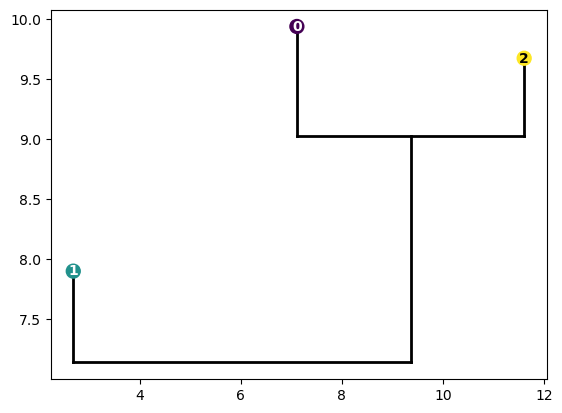

In [39]:
est.get_dendrogram()